## chap14 모델 성능 향상시키기
### 와인 자료 활용 -> 레드와인, 화이트와인 예측

In [1]:
# 모델 : Sequential, 레이어 : Dense, 학습과 테스트 : 8:2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


In [2]:

df = pd.read_csv('./data/wine.csv', header=None)   # 데이터 불러옴
df.head()   # 마지막 속성이 클래스
X = df.iloc[ : , 0:-1]   # 클래스를 결정하는 속성 분리
y = df.iloc[ : , -1]  # 클래스 분리

In [3]:
# 데이터를 학습데이터와 테스트 데이터로 분리 -> trian_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 생성
model  = Sequential()
model.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 모델 컴파일 : loss, optimizer, metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행 
history = model.fit(X_train, y_train, epochs=50, validation_split=0.25)

Epoch 1/50


122/122 [==============================] - 2s 6ms/step - loss: 0.2336 - accuracy: 0.9184 - val_loss: 0.1811 - val_accuracy: 0.9354
Epoch 2/50
122/122 [==============================] - 0s 3ms/step - loss: 0.1878 - accuracy: 0.9369 - val_loss: 0.1644 - val_accuracy: 0.9354
Epoch 3/50
122/122 [==============================] - 1s 4ms/step - loss: 0.1629 - accuracy: 0.9456 - val_loss: 0.1485 - val_accuracy: 0.9477
Epoch 4/50
122/122 [==============================] - 1s 4ms/step - loss: 0.1568 - accuracy: 0.9484 - val_loss: 0.1468 - val_accuracy: 0.9431
Epoch 5/50
122/122 [==============================] - 1s 6ms/step - loss: 0.1421 - accuracy: 0.9497 - val_loss: 0.1334 - val_accuracy: 0.9485
Epoch 6/50
122/122 [==============================] - 1s 5ms/step - loss: 0.1259 - accuracy: 0.9548 - val_loss: 0.1336 - val_accuracy: 0.9577
Epoch 7/50
122/122 [==============================] - 1s 4ms/step - loss: 0.1214 - accuracy: 0.9564 - val_loss: 0.1148 - val_accuracy: 0.9569
Epoch 8/50
122/12

In [5]:
history.history['val_accuracy']

[0.9353846311569214,
 0.9353846311569214,
 0.947692334651947,
 0.9430769085884094,
 0.9484615325927734,
 0.9576923251152039,
 0.9569230675697327,
 0.9584615230560303,
 0.9607692360877991,
 0.9692307710647583,
 0.9607692360877991,
 0.9707692265510559,
 0.9584615230560303,
 0.9700000286102295,
 0.9700000286102295,
 0.9653846025466919,
 0.9738461375236511,
 0.9723076820373535,
 0.9638461470603943,
 0.9753845930099487,
 0.9723076820373535,
 0.9715384840965271,
 0.9753845930099487,
 0.9776923060417175,
 0.9769230484962463,
 0.9661538600921631,
 0.9730769395828247,
 0.9538461565971375,
 0.9715384840965271,
 0.9784615635871887,
 0.9761538505554199,
 0.9746153950691223,
 0.9715384840965271,
 0.9684615135192871,
 0.9769230484962463,
 0.9792307615280151,
 0.9692307710647583,
 0.9792307615280151,
 0.9669230580329895,
 0.9776923060417175,
 0.9769230484962463,
 0.9784615635871887,
 0.9753845930099487,
 0.9807692170143127,
 0.9800000190734863,
 0.9753845930099487,
 0.9800000190734863,
 0.98000001907

In [6]:
# 모델 엡데이트 하면서 모델 학습 실행
from tensorflow.keras.callbacks import ModelCheckpoint

filename = './data/model/{epoch:02d}-{val_accuracy:.4f}.hdf5'

# 학습 중에 모델 저장
checkpointer = ModelCheckpoint(filepath=filename, verbose=True) 

# 모델 생성
model = Sequential()
model.add(Dense(24,input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 모델 실행 
hist = model.fit(X_train, y_train, epochs=50, validation_split=0.25, 
                 verbose=0,batch_size=500,callbacks=[checkpointer])

# 테스트 결과 출력
score = model.evaluate(X_test, y_test)
print('Test accuracy : ', score[1])



Epoch 1: saving model to ./data/model\01-0.7646.hdf5

Epoch 2: saving model to ./data/model\02-0.7715.hdf5

Epoch 3: saving model to ./data/model\03-0.7962.hdf5

Epoch 4: saving model to ./data/model\04-0.8646.hdf5

Epoch 5: saving model to ./data/model\05-0.8900.hdf5

Epoch 6: saving model to ./data/model\06-0.9246.hdf5

Epoch 7: saving model to ./data/model\07-0.9300.hdf5

Epoch 8: saving model to ./data/model\08-0.9377.hdf5

Epoch 9: saving model to ./data/model\09-0.9369.hdf5

Epoch 10: saving model to ./data/model\10-0.9369.hdf5

Epoch 11: saving model to ./data/model\11-0.9415.hdf5

Epoch 12: saving model to ./data/model\12-0.9392.hdf5

Epoch 13: saving model to ./data/model\13-0.9392.hdf5

Epoch 14: saving model to ./data/model\14-0.9385.hdf5

Epoch 15: saving model to ./data/model\15-0.9400.hdf5

Epoch 16: saving model to ./data/model\16-0.9400.hdf5

Epoch 17: saving model to ./data/model\17-0.9400.hdf5

Epoch 18: saving model to ./data/model\18-0.9385.hdf5

Epoch 19: saving m

In [7]:
# 모델 학습을 2000회 실행
model = Sequential()
model.add(Dense(24,input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 모델 실행 
hist = model.fit(X_train, y_train, epochs=2000, validation_split=0.25, 
                 verbose=0,batch_size=500)

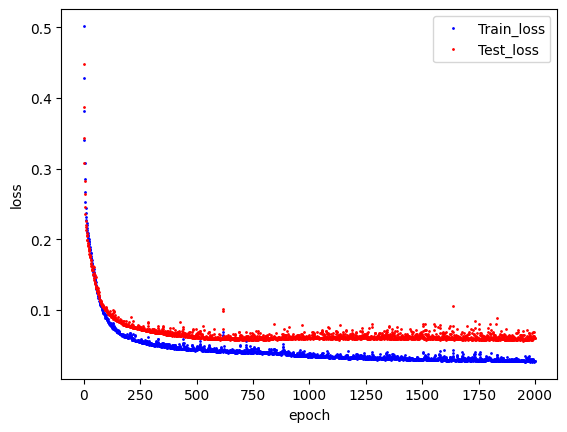

In [8]:
# 실행한 결과를 그래프로 확인 -> 과적합 여부 ?
import matplotlib.pyplot as plt

hist_df = pd.DataFrame(hist.history)
hist_df.head()   # loss, val_loss 의 데이터를 추출
y_loss = hist_df.loss
y_vloss = hist_df['val_loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len,y_loss, "o", c='blue',markersize=1, label='Train_loss' )
plt.plot(x_len,y_vloss, "o", c='red', markersize=1, label='Test_loss' )
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [9]:
# 중단 함수를 이용해서 최상의 모델은 찾음
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 학습이 자동 중단되는 옵션 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# 모델 저장
model_name = './data/model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=model_name, monitor='val_loss', verbose=0,
                               save_best_only=True)

# 모델 학습을 2000회 실행
model = Sequential()
model.add(Dense(24,input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(X_train,y_train, epochs=2000, batch_size=500,
                 validation_split=0.25, 
                 callbacks = [early_stopping, checkpointer])


Epoch 1/2000
8/8 [==============================] - 3s 97ms/step - loss: 2.8175 - accuracy: 0.7549 - val_loss: 2.1983 - val_accuracy: 0.7546
Epoch 2/2000
8/8 [==============================] - 0s 15ms/step - loss: 1.9804 - accuracy: 0.7549 - val_loss: 1.5174 - val_accuracy: 0.7546
Epoch 3/2000
8/8 [==============================] - 0s 26ms/step - loss: 1.3360 - accuracy: 0.7549 - val_loss: 0.9783 - val_accuracy: 0.7546
Epoch 4/2000
8/8 [==============================] - 0s 21ms/step - loss: 0.8121 - accuracy: 0.7549 - val_loss: 0.5564 - val_accuracy: 0.7546
Epoch 5/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.4929 - accuracy: 0.7549 - val_loss: 0.4969 - val_accuracy: 0.7546
Epoch 6/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.4717 - accuracy: 0.7549 - val_loss: 0.4119 - val_accuracy: 0.7546
Epoch 7/2000
8/8 [==============================] - 0s 34ms/step - loss: 0.3900 - accuracy: 0.7549 - val_loss: 0.3769 - val_accuracy: 0.7546
Epoch 8/2000
